# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


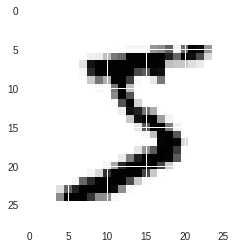

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


###model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
###model.add(Convolution2D(64, 3, 3, activation='relu'))
###model.add(Convolution2D(128, 3, 3, activation='relu'))
###model.add(Convolution2D(64, 3, 3, activation='relu'))
###model.add(Convolution2D(10, 20))
#model.add(MaxPooling2D(pool_size=(2,2)))
###model.add(Flatten())
###model.add(Activation('softmax'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))




#model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2771 - acc: 0.9149
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0989 - acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0737 - acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0602 - acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0520 - acc: 0.9841
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0455 - acc: 0.9855
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0389 - acc: 0.9875
Epoch 8/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0363 - acc: 0.9882
Epoch 9/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0335 - acc: 0.9893
Epoch 10/20
60000/60000 [=========================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.028052773847744312, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.7835129e-18 3.4396269e-15 5.8987146e-15 2.2791618e-13 2.8252813e-16
  1.1123535e-18 2.1922282e-25 1.0000000e+00 5.4511546e-15 6.0713804e-13]
 [2.2612355e-13 6.3908661e-15 1.0000000e+00 2.0574656e-20 8.2356842e-19
  3.5509862e-26 5.7214077e-19 1.0731886e-20 5.5557477e-21 1.5286965e-23]
 [7.3130745e-11 9.9999964e-01 3.8033761e-08 1.0644435e-11 2.7471572e-07
  2.1416567e-10 4.2671968e-09 7.1957523e-08 3.8032457e-08 1.9435333e-09]
 [1.0000000e+00 3.3875894e-13 1.1365936e-09 1.1612098e-10 2.5389143e-14
  1.1764949e-09 9.3127053e-09 2.5314494e-13 1.1519803e-09 2.3423463e-10]
 [1.0216206e-12 9.4228091e-11 1.0041722e-11 1.7213921e-13 9.9999964e-01
  5.0683806e-12 1.8183539e-09 1.8504089e-13 7.0674473e-11 3.6936663e-07]
 [1.0037975e-11 9.9999833e-01 1.4843190e-09 1.2371830e-12 7.4365659e-07
  2.5112976e-11 3.2309128e-10 9.1101157e-07 1.8641380e-08 8.1343277e-10]
 [1.2322414e-18 3.6055489e-10 2.9916658e-14 2.5281388e-15 9.9906665e-01
  4.9924459e-08 2.1074568e-12 7.0046456e-12 9.0736739e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

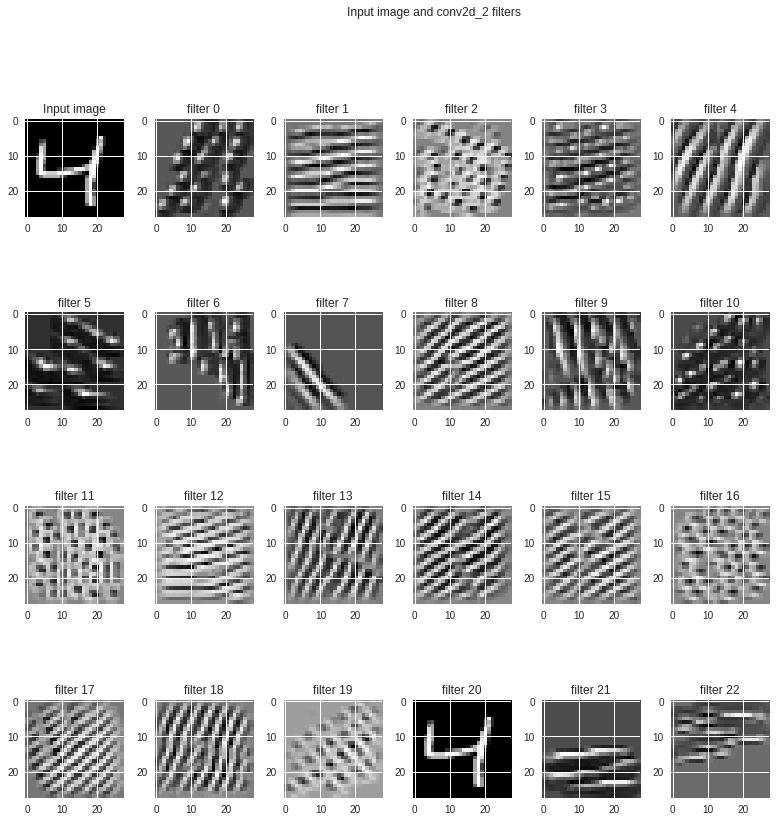

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()